### 1. Fourier Transform

#### 1.1. Generate a discrete signal with 64 samples

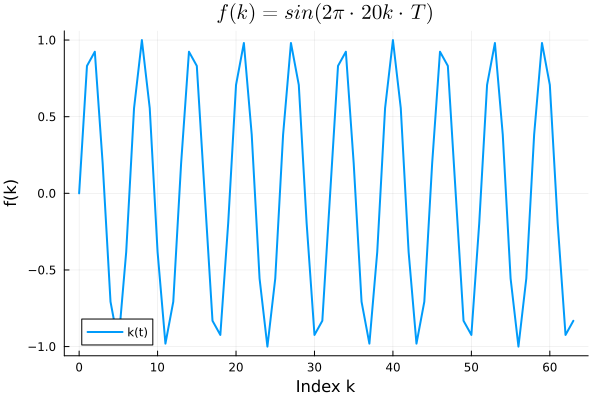

In [42]:
using Plots
using LaTeXStrings

N = 64
T = 1 / 128
k = 0:N-1
f = sin.(2π * 20 * k * T)

plot(k, f, label="k(t)", xlabel="Index k", ylabel="f(k)", title=L"f(k) = sin(2\pi \cdot 20k \cdot T)", lw=2)

#### To determine F(k) that 

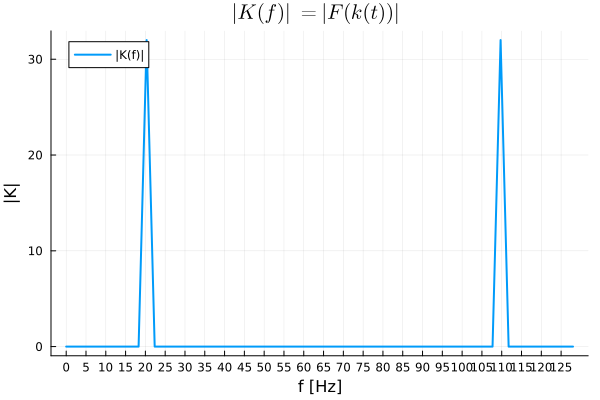

In [43]:
using FFTW

F = fft(f)
sampling_frequency = 1 / T
frequencies = range(0, sampling_frequency, N)
x_axis = range(0, sampling_frequency, step=5)
plot(frequencies, abs.(F), label="|K(f)|", xlabel="f [Hz]", ylabel="|K|", title=L"|K(f)| = |F(k(t))|",
    lw=2, step=2, xaxis=x_axis)

#### Extra: To confirm the result, retry the experiment with a sampling frequency of 108Hz. Then try some values below and above the Nyquist frequency (64Hz) and observe the results.

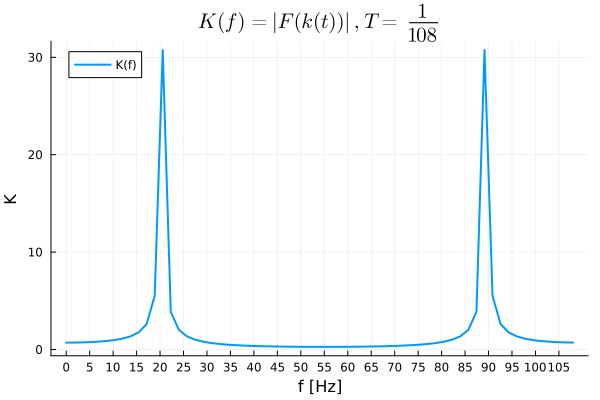

In [44]:
function graph_sampling_frequency(sampling_frequency)
    T = 1 / sampling_frequency
    f = sin.(2π * 20 * k * T)
    F = fft(f)
    frequencies = range(0, sampling_frequency, N)
    x_axis = range(0, sampling_frequency, step=5)
    plot(frequencies, abs.(F), label="K(f)", xlabel="f [Hz]", ylabel="K", title=L"K(f) = |F(k(t))|, T = \frac{1}{%$sampling_frequency}",
        lw=2, step=2, xaxis=x_axis)
end
graph_sampling_frequency(108)

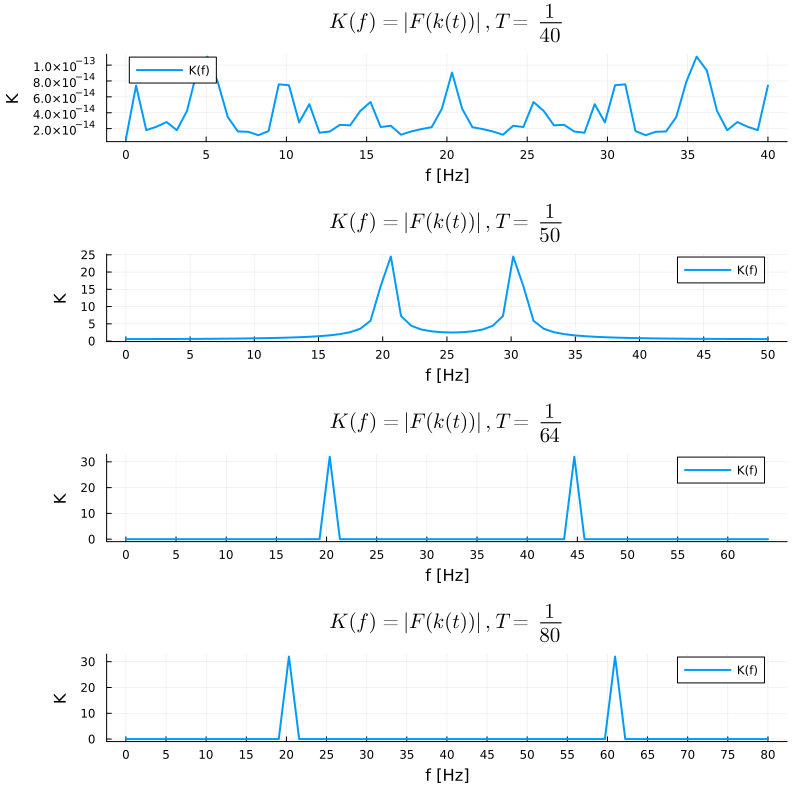

In [57]:
plots = map(graph_sampling_frequency, [40, 50, 64, 80])
plot(plots..., layout=(4, 1), size=(800, 800), lw=2)

On the graphs with a sampling frequency of 40Hz and 50Hz (below the Nyquist frequency), the signal is affected by aliasing. Slightly below the Nyquist frequency, at 50Hz, the signal is still recognizable, but the frequency is not certain. At 40Hz, the signal is completely distorted and unrecognizable.

### Sampling Theorem
#### 1.3 It's recommended to graph only the first half and display the frequency in Hz.

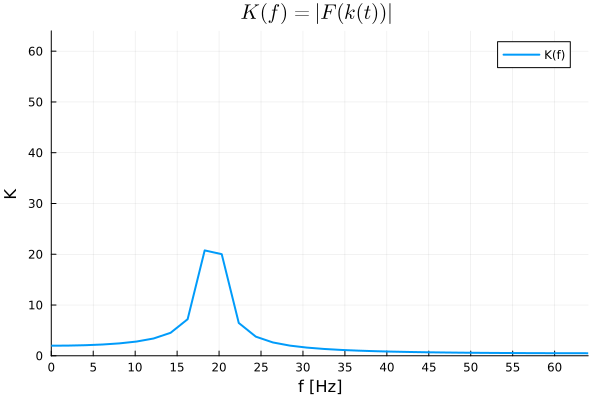

In [77]:
max_frequency = 1 / T

plot(frequencies, abs.(F), label="K(f)", xlabel="f [Hz]", ylabel="K", title=L"K(f) = |F(k(t))|",
    lw=2, step=2, xaxis=x_axis, range=(0, max_frequency / 2))

#### 1.4 Suppose the frequency of the sinusoid is 19Hz. The step in the graph is 2Hz. This means that the analyzed frequency will be distributed among its neighorbs - 18Hz and 20Hz. Verify this.

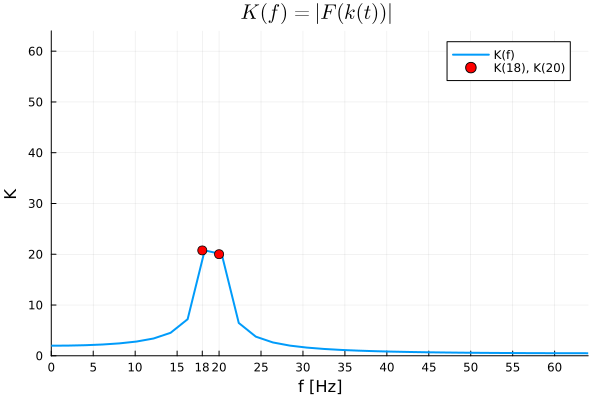

In [87]:
T = 1 / 128
max_frequency = 1 / T
f = sin.(2π * 19 * k * T)
F = fft(f)
plot(frequencies, abs.(F), label="K(f)", xlabel="f [Hz]", ylabel="K", title=L"K(f) = |F(k(t))|",
    lw=2, step=2, xaxis=[x_axis..., 18], range=(0, max_frequency / 2))
# plot the points at frequencies 18 and 20
scatter!([18, 20], [abs.(F[10:11])], label="K(18), K(20)", markersize=5, color=:red)

### 2. Determining the module and phase of the Fourier Transform
#### 2.1 Create a signal composed of 2 sinusoids and plot the spectrum of modules and phases.

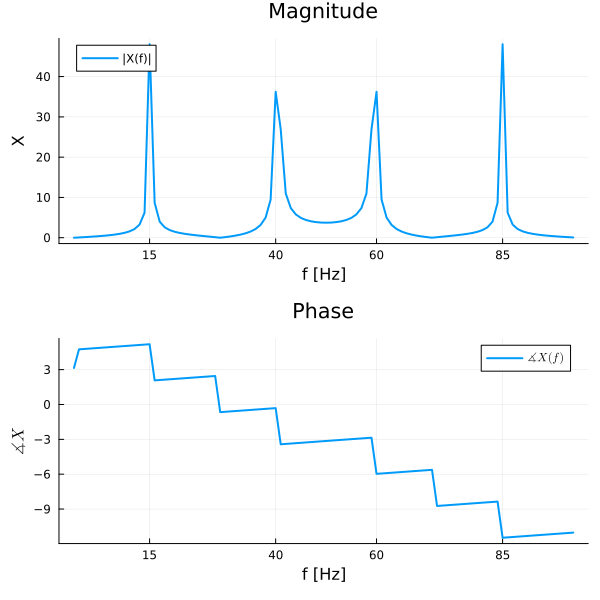

In [121]:
using DSP

t = 0:1/99:1
x = sin.(2π * 15 * t) + sin.(2π * 40 * t)

X = fft(x)
magnitude = abs.(X)
phases = unwrap(angle.(X), range=2π)
frequencies = 0:99
x_axis = [15, 40, 60, 85]
p1 = plot(frequencies, magnitude, label="|X(f)|", xlabel="f [Hz]", ylabel="X", title="Magnitude",
    lw=2, xaxis=x_axis)
p2 = plot(frequencies, phases, label=L"\measuredangle{X(f)}", xlabel="f [Hz]",
    ylabel=L"\measuredangle{X}", title="Phase",
    lw=2, xaxis=x_axis)
plot(p1, p2, layout=(2, 1), size=(600, 600), lw=2)